In [56]:
import pandas as pd
import numpy as np
import yfinance as yf

In [57]:
compras = {'VALE3.SA':200,'AAPL34.SA':500,
           'COCA34.SA':300,'WEGE3.SA':350,
           'PETR4.SA':400,
           'BPAC11.SA':100,
           'SMAL11.SA':100,
           'TAEE11.SA' :200
           }

In [58]:
list(compras.keys())
sum(compras.values())

2150

<Axes: xlabel='Date'>

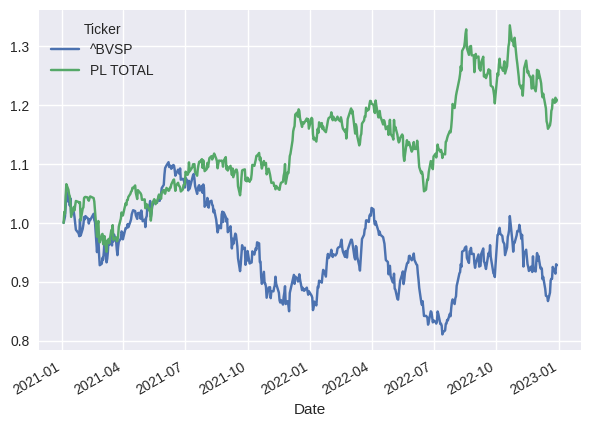

In [60]:
inicio = '2021-01-01'
fim = '2023-01-01'

precos = yf.download(list(compras.keys()), start = inicio, end = fim, progress=False)
primeiro = precos.iloc[0]

compras_df = pd.Series(compras, index=list(compras.keys()))
qtd_acoes = round(compras_df/primeiro[0])
qtd_acoes = round(compras_df/primeiro['Close'])
qtd_acoes

PL = precos['Close'] * qtd_acoes
PL['PL TOTAL'] = PL.sum(axis=1)
PL.head()

ibov = yf.download('^BVSP', start = inicio, end = fim, progress=False)['Close']

pd.DataFrame(ibov)

consolido = pd.merge(PL, ibov, how = 'inner', left_index=True, right_index=True)
consolido.head()


ajuste_cons = consolido/consolido.iloc[0]
ajuste_cons[['^BVSP', 'PL TOTAL']].plot(figsize=(7,5))

In [61]:
def simula_carteira(inicio , fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress=False)
  primeiro = precos.iloc[0]
  compras_df = pd.Series(carteira, index=list(carteira.keys()))
  qtd_acoes = round(compras_df/primeiro['Close'])
  pl = precos['Close'] * qtd_acoes
  pl['PL TOTAL'] = pl.sum(axis=1)
  ibov = yf.download('^BVSP', start = inicio, end = fim, progress=False)['Close']
  consolido = pd.merge(pl, ibov, how = 'inner', left_index=True, right_index=True)
  ajuste_cons = consolido/consolido.iloc[0]
  ajuste_cons[['^BVSP', 'PL TOTAL']].plot(figsize=(7,5));
  return ajuste_cons

Ticker,ABEV3.SA,BBDC4.SA,ITSA4.SA,ITUB4.SA,PETR3.SA,VALE3.SA,PL TOTAL,^BVSP
Date,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.021318,0.993903,0.992208,0.993528,1.030508,1.016838,1.008838,1.005609
2021-01-06,1.041990,1.026844,1.012121,1.022654,1.042373,1.050186,1.033727,1.010906
2021-01-07,1.036822,1.054105,1.052814,1.062460,1.072882,1.118740,1.072624,1.028661
2021-01-08,1.067830,1.045018,1.050216,1.062136,1.070848,1.115241,1.072765,1.054986
...,...,...,...,...,...,...,...,...
2022-12-23,1.037931,0.740463,0.952624,0.878149,1.934839,1.216847,1.175661,0.925269
2022-12-26,1.030831,0.722856,0.940411,0.860719,1.928741,1.227983,1.169038,0.917171
2022-12-27,1.030831,0.719433,0.930419,0.855838,1.941613,1.257305,1.175544,0.913873


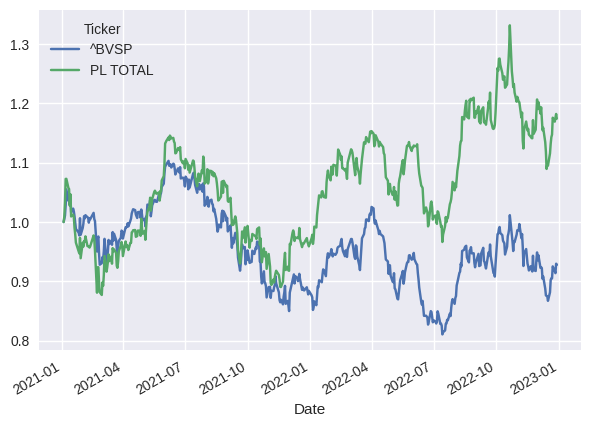

In [62]:
portifolio = {
    'ITSA4.SA': 500,  # Itaúsa
    'BBDC4.SA': 400,  # Bradesco
    'PETR3.SA': 600,  # Petrobras
    'VALE3.SA': 700,  # Vale
    'ABEV3.SA': 300,  # Ambev
    'ITUB4.SA': 550   # Itaú Unibanco
}

simula_carteira(inicio,fim ,portifolio)